In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


[]

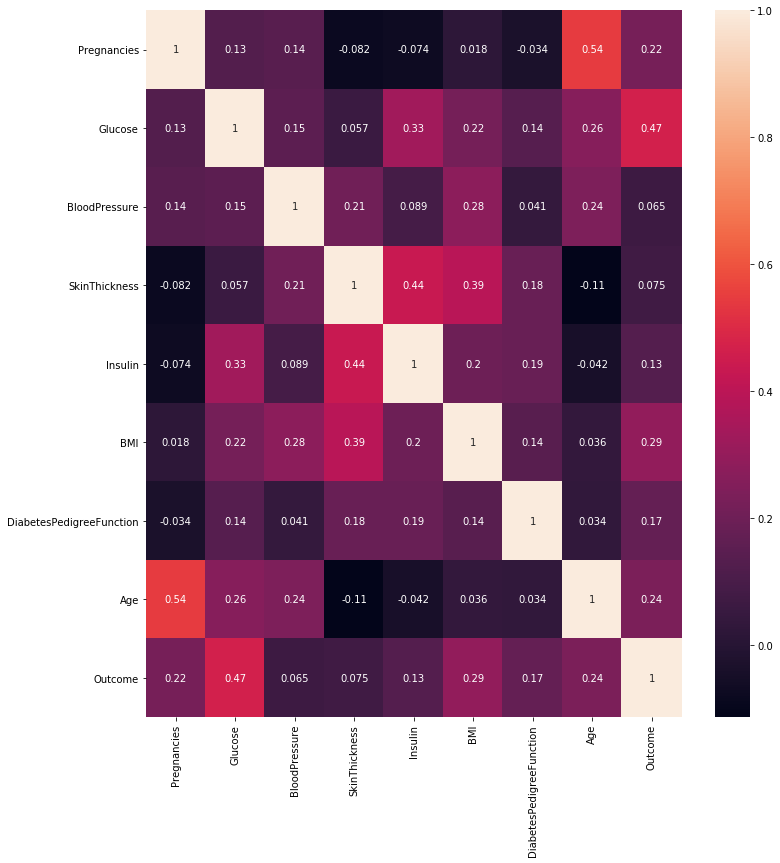

In [10]:
plt.figure(figsize=(12,13))
sns.heatmap(data.corr(),annot=True)
plt.plot()

In [12]:
import statsmodels.formula.api as smf

In [13]:
from sklearn.model_selection import train_test_split

In [45]:
X=data.iloc[:,:-1]

In [46]:
y=data.iloc[:,-1]

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [57]:
sm=smf.OLS(y,X).fit()

In [58]:
sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     142.9
Date:                Fri, 12 Oct 2018   Prob (F-statistic):          5.88e-107
Time:                        14:41:19   Log-Likelihood:                -431.66
No. Observations:                 768   AIC:                             873.3
Df Residuals:                     763   BIC:                             896.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.0230      0.005      4.933      0.000       0.014       0.032
Glucose                      0.0042      0.000     10.811      0.000       0.003       0.005
BloodPressure               -0.0044      0.001     -6.346      0.000      -0.006      -0.003
SkinThickness                0.0010      0.001      1.038      0.300      -0.001       0.003
DiabetesPedigreeFunction     0.1078      0.047      2.290      0.022       0.015       0.200
==============================================================================
Omnibus:                      261.236   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.309
Skew:                           0.574   Prob(JB):                     9.89e-18
Kurtosis:                       1.937   Cond. No.                         441.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
X=X.values

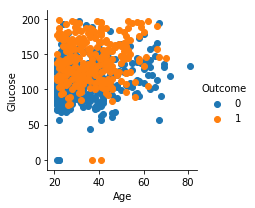

In [63]:
sns.FacetGrid(data,hue="Outcome",height=3)\
.map(plt.scatter,"Age","Glucose")\
.add_legend()

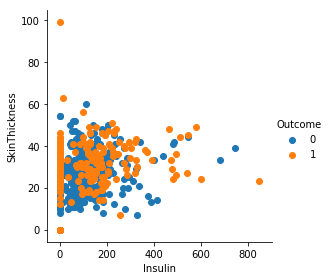

In [65]:
sns.FacetGrid(data,hue="Outcome",height=4)\
.map(plt.scatter,"Insulin","SkinThickness")\
.add_legend()

In [66]:
from scipy import stats

In [67]:
z=np.abs(stats.zscore(data))

In [70]:
threshold=3
print(np.where(z>3))

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753]), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4]))


In [72]:
data1=data

In [73]:
data1=data1[(z<3).all(axis=1)]

In [76]:
data1.shape

(688, 9)

([array([8., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([8., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([8., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([7., 2., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([7., 2., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([8., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([8., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([8., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([7., 0., 1., 0., 0., 0., 1., 0., 0., 0.]),
  array([7., 2., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([7., 2., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([8., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([8., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([7., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
  array([7., 1., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([8., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([7., 1., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([8., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([8., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([7., 2., 0., 0., 0., 0.

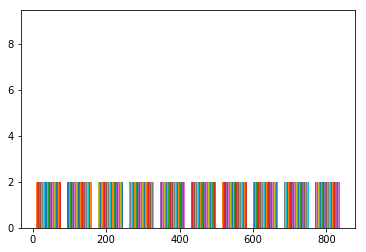

In [78]:
plt.hist(data,height=2)

In [85]:
X=data1.iloc[:,:-1].values

In [87]:
y=data1.iloc[:,-1].values

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
s=StandardScaler()

In [95]:
X=s.fit_transform(X)

In [98]:
from sklearn.linear_model import LogisticRegression

In [100]:
model=LogisticRegression()

In [102]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
(model.score(X_test,y_test))*100

79.22077922077922

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [138]:
results=[]
names=[]
scoring='accuracy'

In [132]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('SVM',SVC()))
models.append(('NB',GaussianNB()))
models.append(('RFR',RandomForestClassifier(n_estimators=300)))


In [144]:
for name,model in models:
    kfold=KFold(n_splits=10,random_state=7)
    cv_results=cross_val_score(model,X,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)
    
    
                
    

LR: 0.787766 (0.057492)
LDA: 0.784868 (0.057678)
CART: 0.705051 (0.052121)
KNN: 0.748593 (0.067589)
SVM: 0.767477 (0.062794)
NB: 0.752962 (0.045102)
RFR: 0.783397 (0.063488)


In [159]:
from sklearn import metrics

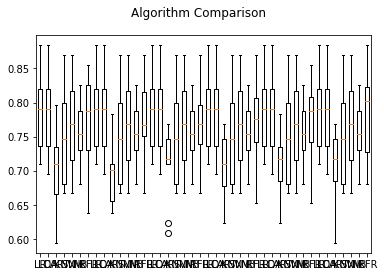

In [147]:
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [160]:
model=LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print("the accuracy of prediction is",metrics.accuracy_score(y_test,prediction) )

the accuracy of prediction is 0.7922077922077922


In [163]:
X_test.shape

(154, 8)

In [194]:
data2=X_test

In [196]:
data2.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
683,4,125,80,0,0,32.3,0.536,27
411,1,112,72,30,176,34.4,0.528,25
45,0,180,66,39,0,42.0,1.893,25
465,0,124,56,13,105,21.8,0.452,21
360,5,189,64,33,325,31.2,0.583,29


In [172]:
predict=pd.DataFrame(prediction)

In [175]:
predict.columns=["Prediction"]

In [190]:
predict

,Prediction
0,0
1,0
2,1
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [191]:
.

SyntaxError: invalid syntax (<ipython-input-191-a5d5b61aa8a6>, line 1)